In [244]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [245]:
df = load_iris()

## Train test split

In [246]:
X = pd.DataFrame(data=df['data'], columns= df['feature_names'])
y = pd.DataFrame(data=df['target'],columns = ['target'])

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [248]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120, 1)
(30, 4)
(30, 1)


In [249]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

## Check accuracy

In [250]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.8666666666666667


## Confusion matrix

In [251]:
from sklearn.metrics import confusion_matrix

In [252]:
confusion_matrix(y_test, pred)

array([[9, 0, 0],
       [0, 8, 2],
       [0, 2, 9]])

## classification_report

In [253]:
from sklearn.metrics import classification_report
rpt = classification_report(y_test, pred)
print(rpt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.80      0.80        10
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



In [254]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
120,6.9,3.2,5.7,2.3
122,7.7,2.8,6.7,2.0
49,5.0,3.3,1.4,0.2
29,4.7,3.2,1.6,0.2
...,...,...,...,...
76,6.8,2.8,4.8,1.4
13,4.3,3.0,1.1,0.1
81,5.5,2.4,3.7,1.0
91,6.1,3.0,4.6,1.4


In [255]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
120,6.9,3.2,5.7,2.3
122,7.7,2.8,6.7,2.0
49,5.0,3.3,1.4,0.2
29,4.7,3.2,1.6,0.2
...,...,...,...,...
76,6.8,2.8,4.8,1.4
13,4.3,3.0,1.1,0.1
81,5.5,2.4,3.7,1.0
91,6.1,3.0,4.6,1.4


In [256]:
path = "/mnt/d/data/titanic/train.csv"
df = pd.read_csv(path)

## Label encoder

In [257]:
from sklearn.preprocessing import LabelEncoder
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])


## 파생변수

In [258]:
df["combined"] = df["SibSp"] + df["Parch"]

# Unsupervised Classification

In [259]:
df = load_iris()
X = pd.DataFrame(data=df['data'], columns= df['feature_names'])
y = pd.DataFrame(data=df['target'],columns = ['target'])
df = pd.concat([X, y], axis=1)


In [260]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [261]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[["sepal length (cm)"]] = scaler.fit_transform(df[["sepal length (cm)"]])
df[["sepal width (cm)"]] = scaler.fit_transform(df[["sepal width (cm)"]])
#...

In [262]:
X = df[df.columns[:-1]]
y = df["target"]

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [264]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


## KNN

In [265]:
from sklearn.neighbors import KNeighborsClassifier

In [266]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [267]:
pred = knn.predict(X_test)

acc =accuracy_score(y_test, pred)
print(acc)

0.9333333333333333


# SVC

In [268]:
path = "/mnt/d/data/titanic/train.csv"
df = pd.read_csv(path)

### One hot encodeing

In [269]:
# from sklearn.preprocessing import LabelEncoder
# df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
# df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])
# df["Name"] = LabelEncoder().fit_transform(df["Name"])

In [270]:
onehot_sex= pd.get_dummies(df["Sex"])
df = pd.concat([df, onehot_sex], axis=1)

onehot_e = pd.get_dummies(df["Embarked"])
df = pd.concat([df, onehot_e], axis=1)

In [271]:
#모델 돌리기용
df = df.fillna(0)

In [272]:
X = df[[i for i in df.columns if i not in ["Survived", "Ticket", "Cabin", "Name", "Sex", "Embarked"]]]
y = df["Survived"]

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

## SVC

In [274]:
from sklearn.svm import SVC

In [275]:
svc = SVC(kernel="rbf")
svc.fit(X_train[X_train.columns[:-10]], y_train)

SVC()

In [276]:
svc = SVC(kernel="linear", C=1, gamma=0.1)
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.1, kernel='linear')

In [277]:
svc = SVC(kernel="rbf", C=0.1, gamma=0.1)
svc.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1)

# Logistic regression

In [278]:
df = load_iris()

In [279]:
X = pd.DataFrame(data=df['data'], columns= df['feature_names'])
y = pd.DataFrame(data=df['target'],columns = ['target'])

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [281]:
from sklearn.linear_model import LogisticRegression

In [282]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/home/hykhhijk/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [283]:
pred = lr.predict(X_test)

In [284]:
acc = accuracy_score(y_test, pred)
print(acc)

0.9333333333333333


# Regression

In [285]:
df = sklearn.datasets.load_breast_cancer()

In [286]:
X = pd.DataFrame(data=df['data'], columns= df['feature_names'])
y = pd.DataFrame(data=df['target'],columns = ['target'])

In [287]:
X = X["mean concavity"]

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [289]:
from sklearn.linear_model import LinearRegression

In [290]:
lr = LinearRegression()
lr.fit(np.array(X_train).reshape(-1, 1), y_train)

LinearRegression()

In [291]:
print(f"기울기 a: {lr.coef_}")
print(f"절편 b: {lr.intercept_}")

기울기 a: [[-4.1412694]]
절편 b: [0.99174737]


In [292]:
pred = lr.predict(np.array(X_test).reshape(-1, 1))

### r2_score

In [293]:
from sklearn.metrics import r2_score

In [294]:
score = r2_score(y_test,pred)
print(score)

0.4805943488193747


In [295]:
X = pd.DataFrame(data=df['data'], columns= df['feature_names'])
y = pd.DataFrame(data=df['target'],columns = ['target'])


In [296]:
corr = X.corr(method="pearson")
print(corr)

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -

# Unsupervised Learning

In [297]:
df = load_iris()

## KMeans

In [298]:
from sklearn.cluster import KMeans

In [299]:
X = pd.DataFrame(data=df['data'], columns= df['feature_names'])
y = pd.DataFrame(data=df['target'],columns = ['target'])


In [300]:
cluster1 = KMeans(n_clusters=3, n_init=10, max_iter=500, algorithm="auto")

cluster1.fit(X)

/home/hykhhijk/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', max_iter=500, n_clusters=3, n_init=10)

In [301]:
center = cluster1.cluster_centers_
prediction = cluster1.predict(X)
print(pd.DataFrame(center))
print(prediction)

          0         1         2         3
0  5.901613  2.748387  4.393548  1.433871
1  5.006000  3.428000  1.462000  0.246000
2  6.850000  3.073684  5.742105  2.071053
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [302]:
pd.concat([y, pd.DataFrame(prediction)], axis=1)
#그룹은 묶어주는데 인덱스는 다를 수 있다

,target,0
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
145,2,2
146,2,0
147,2,2
148,2,2


## elblow 기법

In [303]:
import matplotlib.pyplot as plt

/home/hykhhijk/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hykhhijk/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hykhhijk/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hykhhijk/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hykhhijk/a

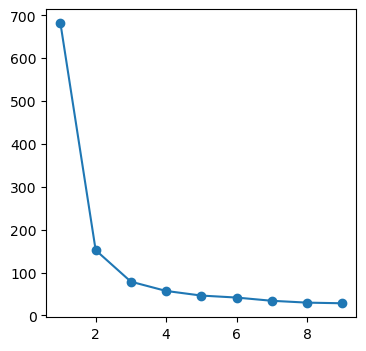

In [304]:
scope = range(1, 10)
inertias = []

for k in scope:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(4, 4))
plt.plot(scope, inertias, "-o")

# 연관분석
1-286페이지

In [305]:
from mlxtend.frequent_patterns import apriori, association_rules

In [312]:
path = "/mnt/d/data/retail_dataset.csv"
df = pd.read_csv(path)

In [313]:
df

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
310,Bread,Eggs,Cheese,NaN,NaN,NaN,NaN
311,Meat,Milk,Pencil,NaN,NaN,NaN,NaN
312,Bread,Cheese,Eggs,Meat,Pencil,Diaper,Wine
313,Meat,Cheese,NaN,NaN,NaN,NaN,NaN


In [318]:
items = set()
for col in df:
    items.update(df[col].unique())

itemset = set(items)
encoding = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    dismatch = list(itemset - rowset)
    match = list(itemset.intersection(rowset))

    for i in dismatch:
        labels[i] = 0
    for j in match:
        labels[j]=1
    encoding.append(labels)


In [322]:
result = pd.DataFrame(encoding)

In [329]:
df.loc[0]

0     Bread
1      Wine
2      Eggs
3      Meat
4    Cheese
5    Pencil
6    Diaper
Name: 0, dtype: object

In [330]:
result
#기존의 장바구니 항목 -> 항목별 구매 여부

,NaN,Bagel,Milk,Eggs,Diaper,Meat,Bread,Cheese,Pencil,Wine
0,0,0,0,1,1,1,1,1,1,1
1,0,0,1,0,1,1,1,1,1,1
2,1,0,1,1,0,1,0,1,0,1
3,1,0,1,1,0,1,0,1,0,1
4,1,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
310,1,0,0,1,0,0,1,1,0,0
311,1,0,1,0,0,1,0,0,1,0
312,0,0,0,1,1,1,1,1,1,1
313,1,0,0,0,0,1,0,1,0,0


In [338]:
result = result.drop(result.columns[0], axis=1)

In [339]:
freq_items = apriori(result, min_support=0.2, use_colnames=True)

/home/hykhhijk/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [340]:
freq_items

,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.438095,(Eggs)
3,0.406349,(Diaper)
4,0.476190,(Meat)
5,0.504762,(Bread)
6,0.501587,(Cheese)
7,0.361905,(Pencil)
8,0.438095,(Wine)
9,0.225397,"(Bagel, Milk)"


In [341]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)

In [342]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650,0.402687
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
2,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
3,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624,0.387409
4,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203,0.469167
5,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540,0.500891
6,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891,0.526414
7,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754,0.330409
8,"(Meat, Cheese)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845,0.296655
9,"(Meat, Milk)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137,0.524816
